The following dataset is from the National Institute of Diabetes and Kidney Diseases, India. The goal is to predict whether a patient has diabetes based on diagnostic measurements.

Content
All patients in the dataset are women at least 21 years old.

Columns:
Pregnancies: the number of pregnancies
Glucose: Glucose test result
BloodPressure: diastolic blood pressure (mm Hg)
SkinThickness: Triceps skinfold thickness (mm)
Insulin: 2-hour serum insulin (mu U/ml)
BMI: Body Mass Index (weight in kg / (height in m) ^ 2)
DiabetesPedigreeFunction: Diabetes Pedigree Function
Age: Age (years)
Outcome: Class (0 - no diabetes, 1 - diabetes)

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Check the data types of each column
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
# Check for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

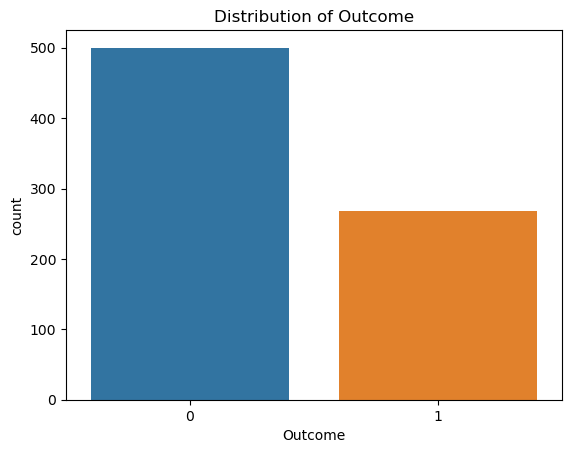

In [10]:
# Visualize the distribution of the target variable (Outcome)
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Outcome')
plt.show()

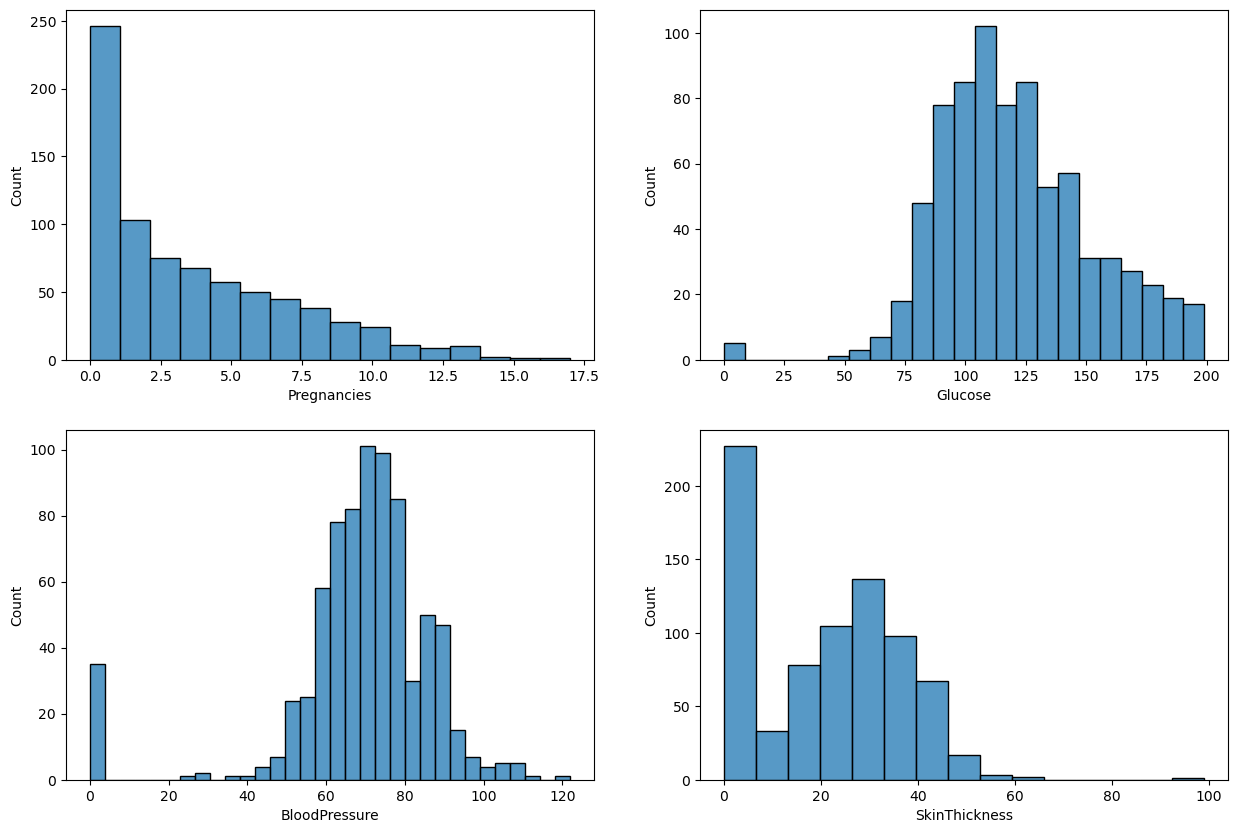

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# General plot names:
sns.histplot(data['Pregnancies'], ax=ax[0, 0])
sns.histplot(data['Glucose'], ax=ax[0, 1])
sns.histplot(data['BloodPressure'], ax=ax[1, 0])
sns.histplot(data['SkinThickness'], ax=ax[1, 1])

plt.show()

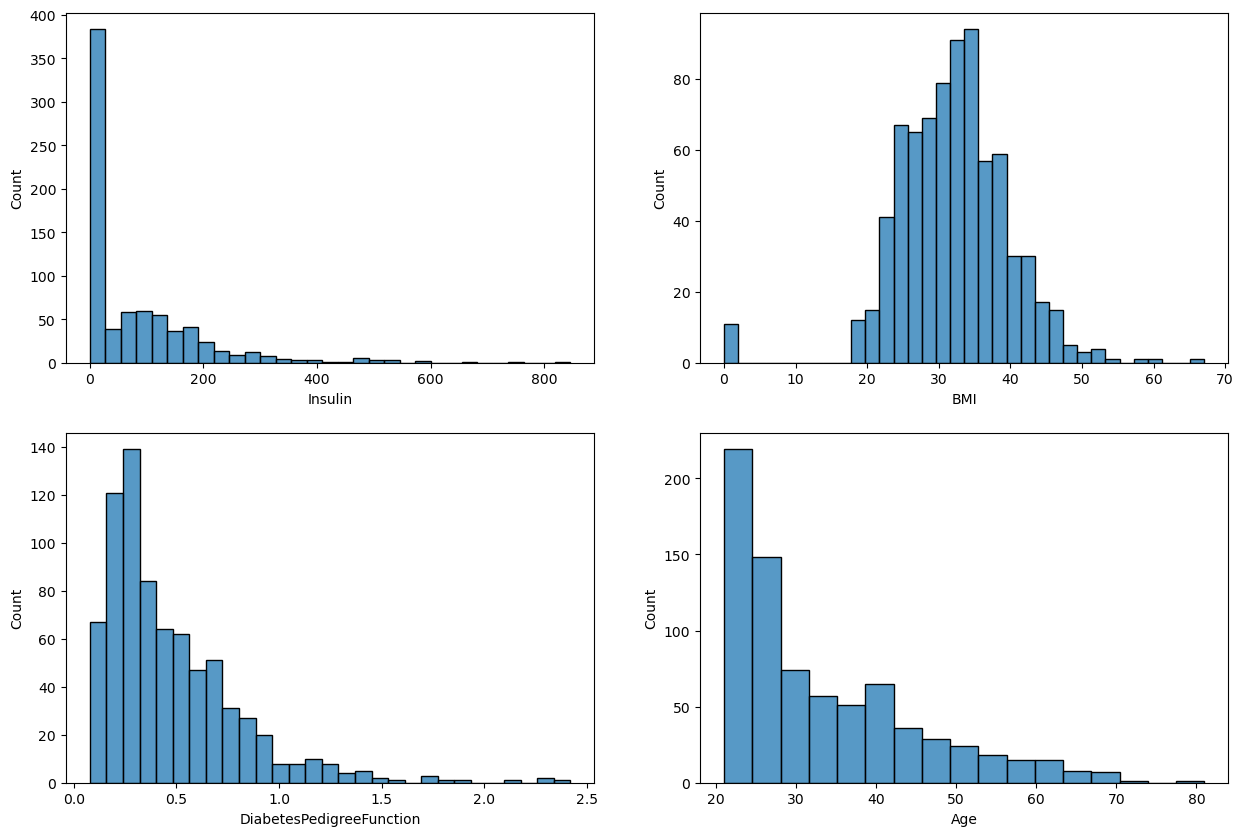

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data['Insulin'], ax=ax[0, 0])
sns.histplot(data['BMI'], ax=ax[0, 1])
sns.histplot(data['DiabetesPedigreeFunction'], ax=ax[1, 0])
sns.histplot(data['Age'], ax=ax[1, 1])
plt.show()

In [15]:
# Create new features
data['BMI_Age'] = data['BMI'] * data['Age']
data['Glucose_BloodPressure'] = data['Glucose'] * data['BloodPressure']


In [16]:
# Remove outliers using z-score
from scipy.stats import zscore
data = data[(np.abs(zscore(data)) < 3).all(axis=1)]

In [17]:
df=data.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Age,Glucose_BloodPressure
0,6,148,72,35,0,33.6,0.627,50,1,1680.0,10656
1,1,85,66,29,0,26.6,0.351,31,0,824.6,5610
2,8,183,64,0,0,23.3,0.672,32,1,745.6,11712
3,1,89,66,23,94,28.1,0.167,21,0,590.1,5874
5,5,116,74,0,0,25.6,0.201,30,0,768.0,8584


In [18]:
# Variables whose minimum values cannot be equal to 0.
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]
zero_columns

['SkinThickness', 'Insulin']

In [19]:
# We are replacing the 0 values in the variables values with NaN.
for col in zero_columns:
    df[col] = np.where(df[col] == 0, np.nan, df[col])
    
df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               189
Insulin                     320
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
BMI_Age                       0
Glucose_BloodPressure         0
dtype: int64

In [20]:
df_filled = df.fillna(df.mean())

In [21]:
df_filled.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BMI_Age                     0
Glucose_BloodPressure       0
dtype: int64

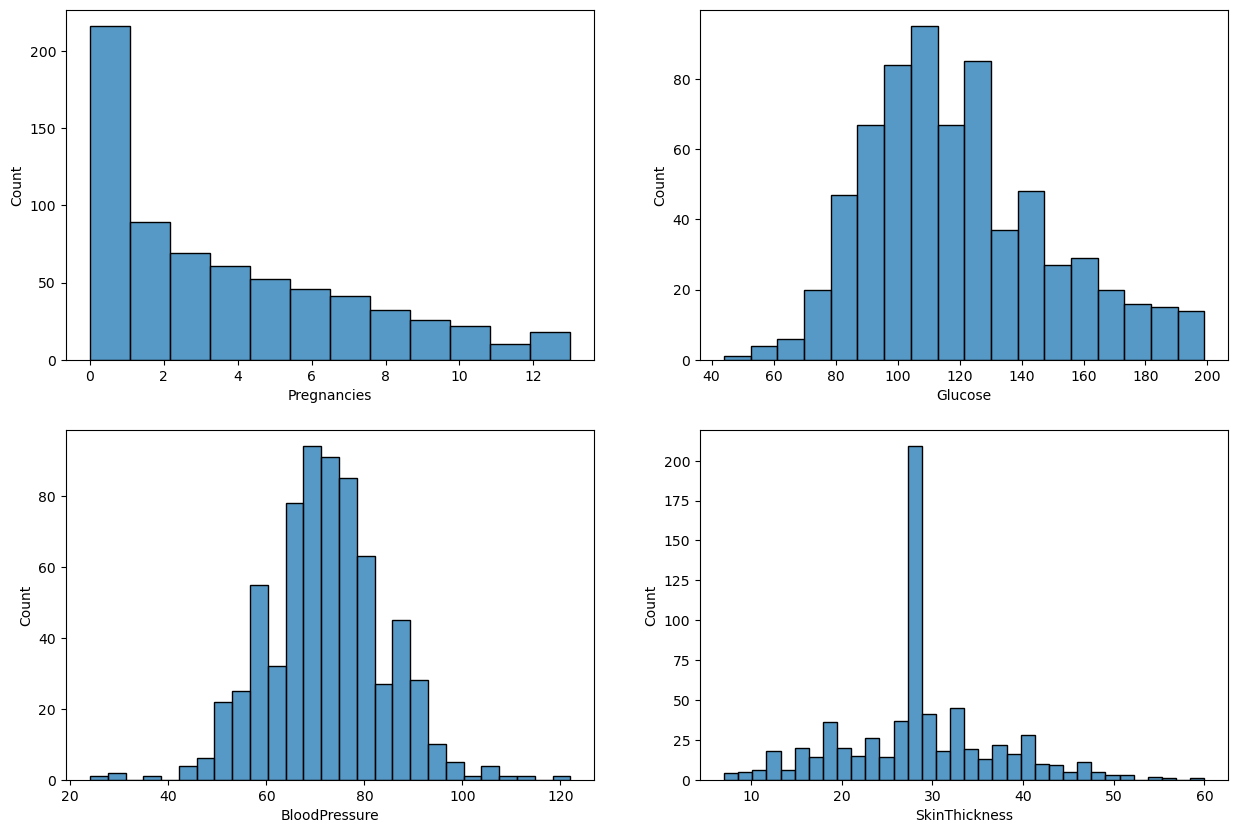

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# General plot names:
sns.histplot(df_filled['Pregnancies'], ax=ax[0, 0])
sns.histplot(df_filled['Glucose'], ax=ax[0, 1])
sns.histplot(df_filled['BloodPressure'], ax=ax[1, 0])
sns.histplot(df_filled['SkinThickness'], ax=ax[1, 1])

plt.show()

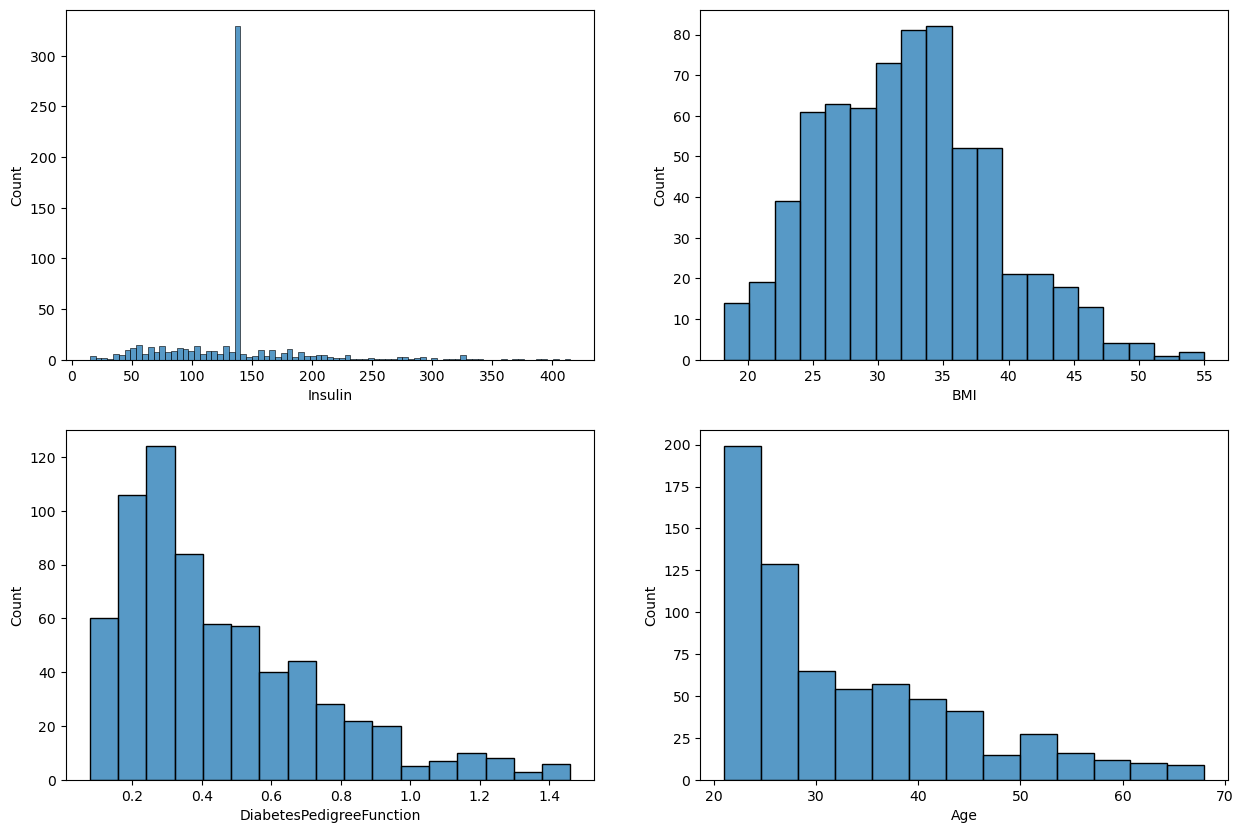

In [76]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df_filled['Insulin'], ax=ax[0, 0])
sns.histplot(df_filled['BMI'], ax=ax[0, 1])
sns.histplot(df_filled['DiabetesPedigreeFunction'], ax=ax[1, 0])
sns.histplot(df_filled['Age'], ax=ax[1, 1])
plt.show()

In [77]:
df_filled.corrwith(data['Outcome'].abs().sort_values(ascending=False))

Pregnancies                 0.226801
Glucose                     0.480912
BloodPressure               0.181976
SkinThickness               0.205124
Insulin                     0.228744
BMI                         0.298036
DiabetesPedigreeFunction    0.216833
Age                         0.246224
Outcome                     1.000000
BMI_Age                     0.360964
Glucose_BloodPressure       0.457451
dtype: float64

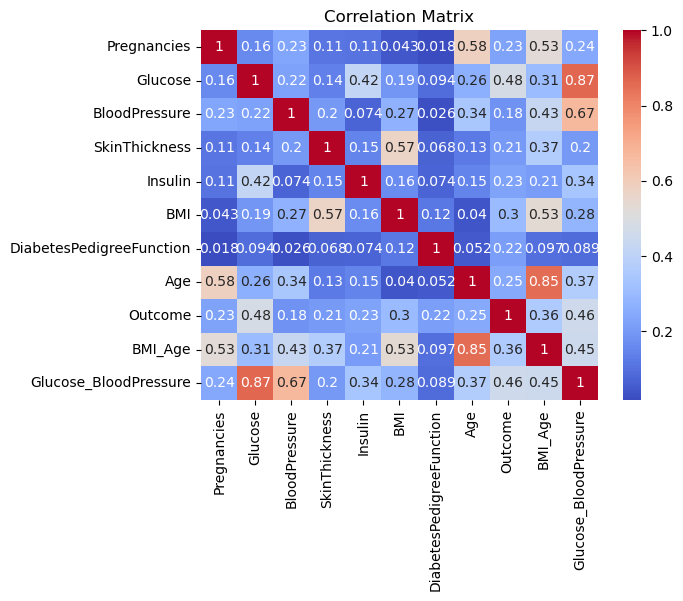

In [78]:
# Visualize the correlation matrix of the features
corr_matrix = df_filled.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [79]:
X=df_filled.drop('Outcome', axis=1).values
y=df_filled['Outcome']

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler=StandardScaler()

In [82]:
X=scaler.fit_transform(X)

In [83]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [84]:
knn_model = KNeighborsClassifier(n_neighbors=11)

In [85]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [86]:
y_predict = knn_model.predict(X_test)

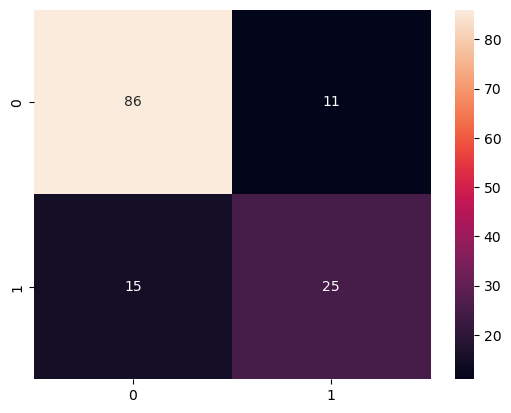

In [87]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [88]:
confusion_matrix(y_test, y_predict)

array([[86, 11],
       [15, 25]], dtype=int64)

In [89]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"precision={precision}\n recall={recall}\n f1={f1}\n accuracy={accuracy}")

precision=0.6944444444444444
 recall=0.625
 f1=0.6578947368421053
 accuracy=0.8102189781021898


Precision: With a precision of 0.722, it means that out of all the positive predictions made by the model, around 72.2% of them are actually correct. This indicates that the model has good reliability in identifying positive cases.

Recall: The recall of 0.65 suggests that the model is able to capture 65% of all the actual positive cases. While it's not perfect, it indicates that the model is reasonably effective in identifying positive cases.

F1 score: The F1 score is a metric that combines precision and recall into a single value. With an F1 score of 0.684, it represents a balanced measure of both precision and recall. It indicates that the model is performing fairly well in terms of both correctly identifying positive cases and avoiding false positives.

Accuracy: The accuracy of 0.825 implies that the model is correctly classifying approximately 82.5% of all cases. While accuracy is an important metric, it's important to consider precision, recall, and F1 score in conjunction with accuracy to get a comprehensive understanding of the model's performance.

Overall, the given results suggest that the model is performing reasonably well, with a good level of precision and recall.

In [90]:
knn_model.predict(X_test)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0], dtype=int64)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        97
           1       0.69      0.62      0.66        40

    accuracy                           0.81       137
   macro avg       0.77      0.76      0.76       137
weighted avg       0.81      0.81      0.81       137



In [92]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn_model, X = X, y = y, cv = 5)

# Modelni baholash 
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       458
           1       0.70      0.56      0.62       224

    accuracy                           0.78       682
   macro avg       0.75      0.72      0.73       682
weighted avg       0.77      0.78      0.77       682



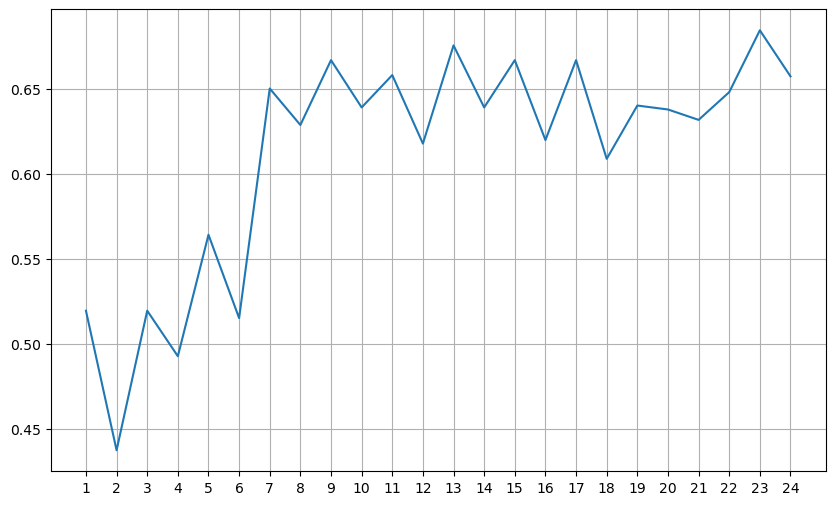

In [93]:
f1=[]
for k in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=k)## value of k
    knn.fit(X_train, y_train)
    y_predict=knn.predict(X_test)
    f1.append(f1_score(y_test,y_predict))
plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid={'n_neighbors': np.arange(1,25)}
knn_gscv=GridSearchCV(knn_model, param_grid, cv=5)
knn_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=11),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [96]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 22, 20, 19, 21, 16, 17, 18, 13,  1, 11,  9, 15,  8, 12,  3,
        6,  7,  5, 14, 10,  4,  2])

In [97]:
knn_gscv.best_params_

{'n_neighbors': 11}

In [98]:
knn_gscv.best_score_

0.7771039072563332

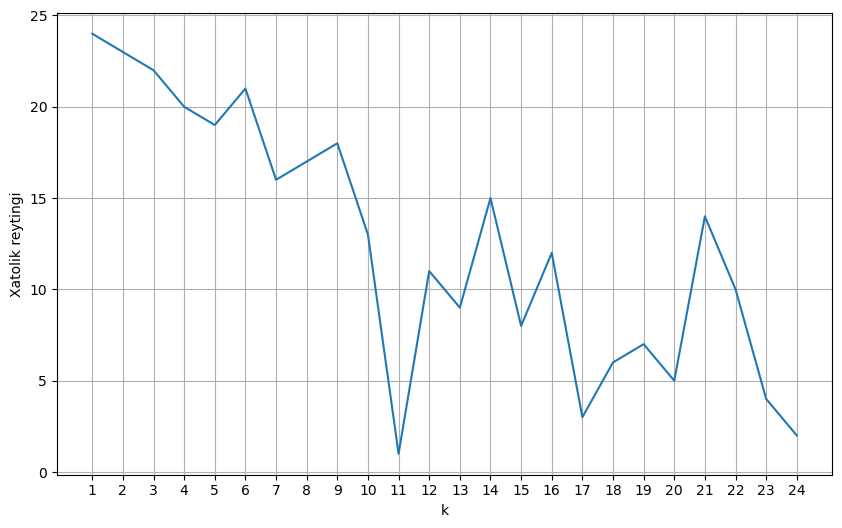

In [99]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()